In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data
----------

In [8]:
df = pd.read_csv('./results_compiled_mnist.csv', )
df.head()

Dataset  Backprop Model Num_layers  Batchsize  LearningRate  TotalEpochs  \
0   MNIST  backprop   kan    2layers       4096        0.0005            0   
1   MNIST  backprop   kan    2layers       4096        0.0005            0   
2   MNIST  backprop   kan    2layers       4096        0.0005            0   
3   MNIST  backprop   kan    2layers       4096        0.0005            0   
4   MNIST  backprop   kan    2layers       4096        0.0005            0   

   Num_parameters Optimizer  Best_train  Best_test  Best_test_at  Avg_time  
0          127040      Adam    0.781634   0.777466             0  7.567812  
1          127040      Adam    0.895368   0.893433             0  7.965244  
2          127040      SGDM    0.786848   0.782837             0  7.630273  
3          127040       SGD    0.786813   0.783203             0  7.484564  
4          127040       SGD    0.897461   0.895996             0  7.665506

## Clean Up and Adding Derived Columns
---------

In [9]:
df['Optimizer'] = pd.Series([x.strip() for x in df.Optimizer])
df['ModelType'] = df['Model'] + "_" + df['Num_layers']
df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))
#df.sort_values('Best_test')
df.sort_values('Efficiency')

Dataset  Backprop Model Num_layers  Batchsize  LearningRate  TotalEpochs  \
56   MNIST  backprop   mlp    2layers       4096        0.0500           98   
58   MNIST  backprop   mlp    2layers       4096        0.0500           98   
81   MNIST  backprop   mlp    3layers       4096        0.0500           98   
57   MNIST  backprop   mlp    2layers       4096        0.0500           98   
82   MNIST  backprop   mlp    3layers       4096        0.0500           98   
..     ...       ...   ...        ...        ...           ...          ...   
68   MNIST  backprop   mlp    3layers       4096        0.0005            2   
70   MNIST  backprop   mlp    3layers       4096        0.0005            2   
88   MNIST  backprop   mlp    3layers       4096        0.0500            4   
78   MNIST  backprop   mlp    3layers       4096        0.0050            4   
89   MNIST  backprop   mlp    4layers       4096        0.0005            4   

    Num_parameters Optimizer  Best_train  Best_test  Best_test_at  Avg_time  \
56           25514      Adam    0.989729   0.966064            33  7.742144   
58           25514      SGDM    0.994001   0.967285            32  7.714621   
81           52842       SGD    0.999494   0.974121            30  7.708465   
57           25514       SGD    0.992292   0.966797            23  7.714469   
82           52842      SGDM    1.000000   0.975098            23  7.670525   
..             ...       ...         ...        ...           ...       ...   
68           52842      Adam    0.975272   0.964111             0  7.586764   
70           52842       SGD    0.975359   0.964355             0  7.531591   
88           52842      SGDM    0.977487   0.964844             0  7.527029   
78           52842       SGD    0.985299   0.966186             0  7.360365   
89          111594      Adam    0.996355   0.974243             0  7.449008   

      ModelType    Efficiency  
56  mlp_2layers    898.507369  
58  mlp_2layers    926.904615  
81  mlp_3layers    993.664517  
57  mlp_2layers   1273.850515  
82  mlp_3layers   1284.770032  
..          ...           ...  
68  mlp_3layers  30487.070728  
70  mlp_3layers  30494.791858  
88  mlp_3layers  30510.232219  
78  mlp_3layers  30552.692580  
89  mlp_4layers  30806.554747  

[98 rows x 15 columns]

## Plotting Test Accuracy against Parameters
-----------

Text(0.5, 1.0, 'Test Acc under Backprop Training Schemes')

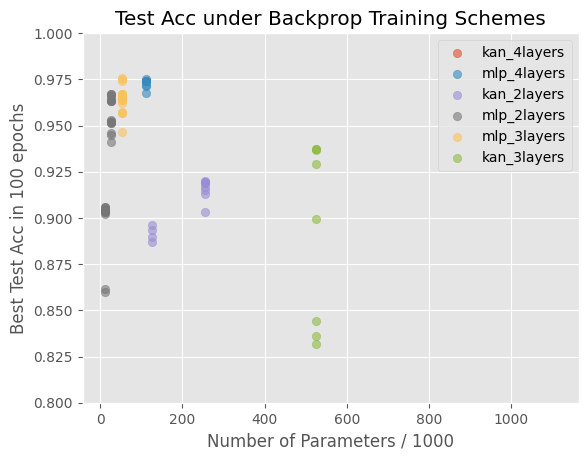

In [13]:
plt.style.use('ggplot')
for model in set(np.unique(df['ModelType'])):
    sa = df[(df.ModelType ==model)]
    plt.scatter(sa.Num_parameters/1000, sa.Best_test, marker = 'o', label = model, alpha = 0.6)
plt.ylim(0.8, 1)
plt.xlabel("Number of Parameters / 1000")
plt.ylabel("Best Test Acc in 100 epochs")
plt.legend()
plt.title("Test Acc under Backprop Training Schemes")

## Plotting Efficiency and Epoch Times
-------

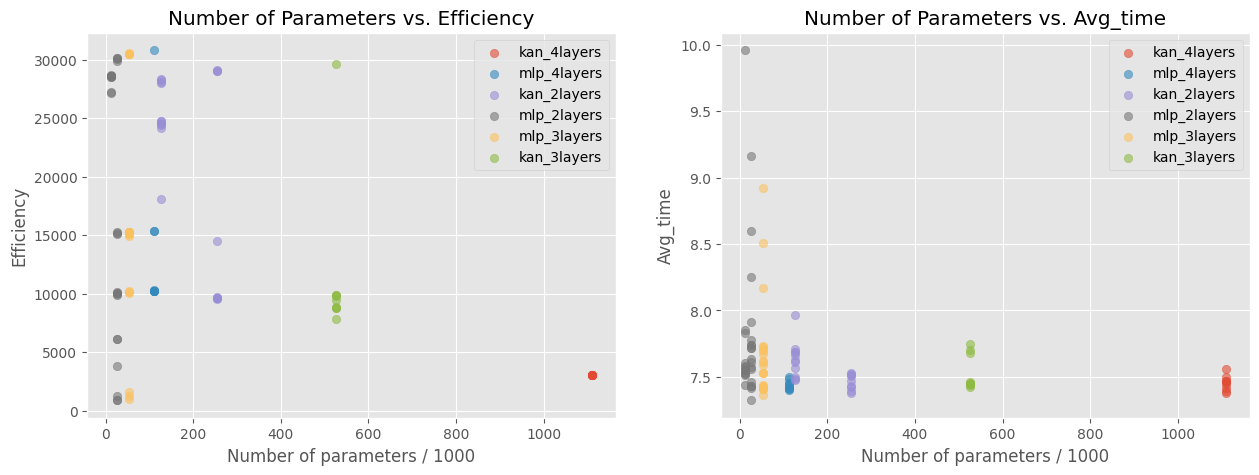

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5)); idx = 0
for metric in ['Efficiency', 'Avg_time']:
    for model in set(np.unique(df['ModelType'])):
        sa = df[(df.ModelType ==model)]
        axes[idx].scatter(sa.Num_parameters/1000, sa[metric], marker = 'o', label = model, alpha = 0.6)
        axes[idx].set_title("Number of Parameters vs. " + metric)
        axes[idx].set_xlabel("Number of parameters / 1000")
        axes[idx].set_ylabel(metric)
        axes[idx].legend()
    idx += 1

## Bar Plot of Best Achieved Model Performance Under Any Training Scheme
------------

Text(0, 0.5, 'Best Achieved Test Performance')

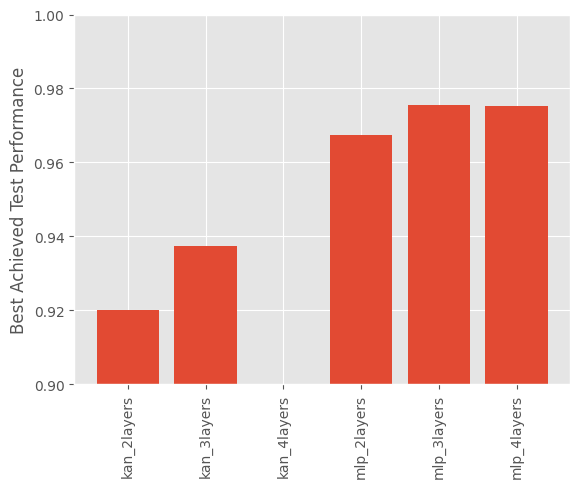

In [22]:
zs = df.groupby("ModelType", group_keys=True)[['Best_test']].max()
plt.bar(zs.index, zs.Best_test); plt.ylim(0.9,1)
plt.xticks(rotation = 90); plt.ylabel("Best Achieved Test Performance")